Recall! You must copy this notebook to your own Drive before using!

# **Graphing Data with Altair**

## **Connect To Your Google Drive**

Here we want to ensure you're able to connect to google drive. If you are unable to connect, try using a different browser like Safari or Edge.

In [1]:
from os import environ
from google.colab import drive

# if we are starting here we need to remount our drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### So Mounting Your Drive Programmatically Has Failed...

If you, like me, and have had trouble like above connecting to Google Drive, fear not! Alternative routes exist. Follow these instructions:



1.   Go to `View` located at the top ribbon within the notebook (between `Edit` and `Insert`).
2.   Select `Table of Contents`
3.   Click on the `file` icon as seen below:

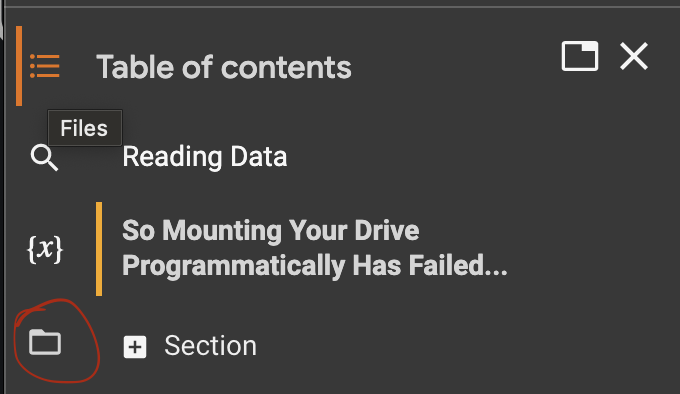

4.   Mount Drive!

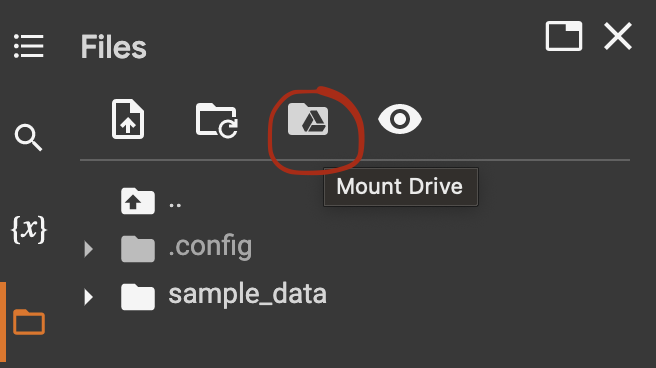

## **The Seven Attributes of a Grammar of Graphics**

1. **Data**: What is the data you want to visualize?
2. **Aesthetics**: What data will be on the x and y axes?
3. **Geometry**: What shapes (bars, lines, points) will you use to represent your data?
4. **Facets**: Will your data be split into multiple plots? If so, how?
5. **Statistics**: Will you use statistical summarizes on your data (e.g. smoothing lines)
6. **Coordinates**: What’s the numeric plotting space?
7. **Themes**: What is the visual identity (fonts, size, colors)?


### **Let's Explore Each Attribute!**

Data: What data do we want to visualize? Let's start by importing our cars data.

In [3]:
from pandas import read_csv

file_path = "/content/drive/MyDrive/Work/Chapman/MGSC_310/MGSC_310_shared_files_and_resources/Data/mtcars.csv"

cars = read_csv(file_path)

cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## **Data**

**What Questions Do We Want to Answer Or Better Understand *of* Our Data?**

* This is critical! Before graphing (or predicting) our data, we must understand what we (or our business stakeholders!) seek to understand (or show their customers).

* To achieve this we need to understand our data!

**Career Tip!**: If your data does does not have a data dictionary associated with it, your stakeholders should not expect you to answer questions definitively!!

### **Understanding MTCars dataset with a data dictionary**



| Var  | Description           | Comments  |
|------|-----------------------|-----------|
| model | Model of Vehicle      | The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camero…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…) |
| mpg  | Miles/US Gallon       | mpg is the determinant of fuel efficiency |
| cyl  | Number of cylinders   | Data includes vehicles with 4,6,8 cylinder engines. |
| disp | Displacement (cu.in.) | Displacement measures overall volume in the engine as a factor of cylinder circumference, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate. |
| hp   | Gross horsepower      | Gross horsepower measures the theoretical output of an engine’s power output; notably, gross rating is of the engine in an isolated environment outside any specific vehicle. When installed in a car, exhaust systems, carburetor, alternator, power systems, etc all influence the power that actually gets to the drive train. Moreover, according to online sources, in the early 1970s, regulatory changes influenced how gross horsepower was measured. As this dataset is from the early-mid 1970s, it’s unclear if hp metrics may be used as reliable comparators of engine power across models as it’s uncertain how manufacturers are reporting. |
| drat | Rear axle ratio       | The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. A vehicle with a high ratio would provide more torque and thus more towing capability, for example. Transmission configuration can often influence a manufacturer’s gearing ratio. |
| wt   | Weight (lb/1000)      | The overall weight of the vehicle per 1000lbs (half US ton) |
| qsec | 1/4 mile time         | A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds). |
| vs   | V/S                   | Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. Configuration offers trade-offs in power/torque, design usage in terms of space/size of engine and performance or center of gravity of vehicle. The geometry and placement of the engine, as influenced by its cylinder head, can have numerous knock-on influences on the vehicle beyond the technical engineering considerations of the cylinder angle. |
| am   | Transmission Type     | A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration. |
| gear | Number of forward gears | Number of gears in the transmission. Manual transmissions have either 4 or 5 forward gears; Automatic either 3 or 4 |
| carb | Number of carburetors  | The number of carburetor barrels. Engines with higher displacement typically have higher barrel configuration to accommodate the increased airflow rate of the larger engine; in other words, more capacity is available for an engine when it may need it versus constraining power output with limited barrels. A vehicle may have multiple physical carburetors, but it’s less common; this metric is the sum of the number of carburetors and the number of barrels inside the carburetor. |


### **Catalytic Converter Business Case**

You work at a used car dealership. You've read in the [news](https://www.justice.gov/opa/pr/justice-department-announces-takedown-nationwide-catalytic-converter-theft-ring) that there are national underground rings dedicated to stealing hundreds of millions of dollars in [catalytic converters](https://en.wikipedia.org/wiki/Catalytic_converter) from cars (from which they siphon valuable metals like paladium!). Your boss comes to you and says that they want to get ahead of this mess.

Do some anlaytics on the data you have about your cars (the dataset above) to illustrate which cars are **most at risk for having their converters stolen**!

#### **Relevant Data**

* As an analyst, you already have access to most of the data you need, but you don't have the key data points you need: catalyric converter values. As a shrewd data analyst, you know that to business stakeholders *any* insight is better than **no** insight, and that true understanding is iterative! Therefore you do the best you can for now to gather **directional** insights about car values!

* So you go to eBay (as I have below) and simply grabbed the "market value" of every corresponding catalytic converter you could (we may want to return to economic auction theory later). Where you could not find converter information, you (I) made a note below!

In [4]:
# all prices grabbed from eBay on 08/29/23 unless otherwise marked
converter_values = {'AMC Javelin': 412.23, # made up
                    'Cadillac Fleetwood': 100.38,
                    'Camaro Z28': 60.99,
                    'Chrysler Imperial': 345.00,
                    'Datsun 710': 69.30,
                    'Dodge Challenger': 23.89,
                    'Duster 360': 69.37,
                    'Ferrari Dino': 324.00, # made up
                    'Fiat 128': 101.40,
                    'Fiat X1-9': 128.82,
                    'Ford Pantera L': 179.54, # made up
                    'Honda Civic': 149.49,
                    'Hornet 4 Drive': 48.00,
                    'Hornet Sportabout': 147.01,
                    'Lincoln Continental': 169.33,
                    'Lotus Europa': 68.00,
                    'Maserati Bora': 200.63,
                    'Mazda RX4': 270.41,
                    'Mazda RX4 Wag': 161.01,
                    'Merc 230': 298.82,
                    'Merc 240D': 316.42, # made up
                    'Merc 280': 367.21, # made up
                    'Merc 280C': 371.67, # made up
                    'Merc 450SE': 481.36, # made up
                    'Merc 450SL': 471.42, # made up
                    'Merc 450SLC': 452.29, # made up
                    'Pontiac Firebird': 205.40,
                    'Porsche 914-2': 382.20, # made up
                    'Toyota Corolla': 110.89,
                    'Toyota Corona': 168.00,
                    'Valiant': 139.00,
                    'Volvo 142E': 228.00}

In [5]:
# Since every key in the dictionary corresponds to every value in cars['model'] let's map those values together to get a new column!

cars['converters'] = cars['model'].map(converter_values).astype(float)

In [ ]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,converters
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,270.41
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,161.01
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,69.30
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,48.00
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,147.01


### **Which cars are most at risk for theft on the used car lot?**

Now that we have our data, let's try to answer our question according to the first three grammars of graphics:

1. **Data: What is the data you want to visualize?**
  - Which cars are more likely to have their converters stolen?
2. **Aesthetics: What data will be on the x and y axes?**
  - The car name will be on the X axis, the y axis will represent value
3. **Geometry: What shapes (bars, lines, points) will you use to represent your data?**
  - Let's use a vertical bar chart!

Before we can graph, we need to understand how!

### **Core Components of Altair**

- **Data**: The dataset being visualized.
- **Mark**: The geometric shape representing data points (e.g., point, line, bar).
- **Encoding**: Mapping of data variables to visual properties (e.g., position, color, size).
- **Scale**: The function that translates data values to visual values.
- **Guide**: Visual aids to help interpret the chart (e.g., axes, legends).
- **Transform**: Data transformations like filtering, aggregation, and sorting.

For more on plotting Altair, **I highly suggest** you read this [documentation](https://altair-viz.github.io/altair-tutorial/notebooks/02-Simple-Charts.html).

In [ ]:
import altair as alt

(alt
.Chart(cars) # call a function with `.`, in case the.Chart function takes our cars
.mark_bar() # we want to make a bar chart!
.encode( # we want to encode (map) our data to proper axes!
    x='model', # our x-axis data
    y='converters' # our y-axis data
)
)

alt.Chart(...)

We did it! But unfortuantely our data is a bit hard to draw conclusions from. Let's fix it. But how? Let's look at the documentation!

Altair Documentation on Sorted Bar Charts: [link](https://altair-viz.github.io/user_guide/generated/channels/altair.X.html)

**Career Tip**: Get *very good* at looking up solutions to problems for yourself in technical documentation! The answers to simple questions are usually available!

In [ ]:
# The answer from the documentation looks pretty straightforward, let's try to implement it for our boss.
(alt.Chart(cars)
    .mark_bar()
    .encode(x=alt.X('model', # wrap your column name with alt.X or alt.Y depending on the axis
                    sort='-y'), # and use sort as an argument. Add - (reverse)
                    # in front of y or x depending on the axis to reverse
            y='converters'
            )
    .interactive() # tip! add .interactive() to be able to adjust the chart
)

alt.Chart(...)

**Remember!** Aesthetics *do* matter! It's hard to read those cars, maybe we want to tilt those x-axis labels. Let's look at the [documentation](https://altair-viz.github.io/user_guide/generated/core/altair.Axis.html) together and figure out how to do this.

In [ ]:
# This is a nicer aesthetic!

(alt.Chart(cars)
    .mark_bar()
    .encode(x=alt.X('model:O',
                    sort='-y',
                    axis=alt.Axis(labelAngle=-45, title=None), # remove the label
                    ),
            y='converters'
            )
    .configure_view(strokeOpacity=0)
    .configure_axis(grid=False)
    .interactive() # tip! add .interactive() to be able to adjust the chart
)

alt.Chart(...)

### Chart Types in Altair

Here are the types of charts you can plot in Altair:
- `mark_point()`: Plots individual data points as small dots.
- `mark_circle()`: Similar to `mark_point()`, but with circular dots.
- `mark_square()`: Plots data points as small squares.
- `mark_line()`: Connects data points with lines, useful for time series or trend visualization.
- `mark_area()`: Fills the area below the line plot, useful for visualizing cumulative data or stacked areas.
- `mark_bar()`: Displays data as vertical or horizontal bars, useful for showing counts or aggregations.
- `mark_tick()`: Represents data points as tick marks along an axis, commonly used for categorical data.

In [ ]:
cols = ['disp', 'mpg', 'converters']
new_df = cars[cols]

## **Facets and Themes: Plotting Multiple Charts Simultaenously**

You show your converter chart to your boss. They're happy that you got an answer to them so fast, but they want to understand more. Specifically, what about cars not yet on the lot? Is there an association between converter prices other car features that could predict whether a **"out of sample"** car (a car not in your data) may have a valuable converter?

[**Facets**](https://altair-viz.github.io/user_guide/generated/channels/altair.Facet.html):
Since you are now searching for patterns, you've decided to facet your data, meaning you'll plot your data onto multiple plots. Each plot will be one feature comparison against converter value


[**Themes**](https://altair-viz.github.io/user_guide/customization.html):
In altair, to customize themes, you use the `.properties()`function after an encoding of a chart has been called.

For more, see the example below!

In [ ]:
# Create a list of columns to facet
cols = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

base_chart = (alt.Chart(cars).mark_circle().encode(
    # Create the x-axis with the 'converters' column, which will be faceted
    alt.X('converters', type='quantitative'),  # Faceting against the 'converters' column

    # Create the y-axis with a repeated column of quantitative values
    alt.Y(alt.repeat("column"), type='quantitative'),

    # Assign colors to points based on the 'model' column
    color='model:N',
    tooltip='model:N'
).properties(
    # Set the width and height of each facet plot
    width=250,
    height=250)
)

# Repeat the base chart for each column in the 'cols' list
facet_chart = base_chart.repeat(
    column=cols
).configure_view(strokeOpacity=0)

facet_chart.interactive()

alt.RepeatChart(...)

### Printing Facets Vertically

It's hard to visualize the data this way. How about this we visualize the data vertically? (You don't have to know this yet).

In [ ]:
# Create a list of columns to facet
cols = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

# Create an empty list to store facet charts
facet_charts = []

# Iterate through columns and create facet charts
for column in cols:
    # Create a facet chart for the current column
    facet_chart = alt.Chart(cars).mark_circle().encode(
        # Create the x-axis with the 'converters' column, which will be faceted
        alt.X('converters', type='quantitative'),  # Faceting against the 'converters' column

        # Create the y-axis with the current column in the iteration
        alt.Y(column, type='quantitative'),

        # Assign colors to points based on the 'model' column
        color='model:N',

        # Display model names when hovering over points
        tooltip='model:N'
    ).properties(
        width=250,  # Set the width of each facet plot
        height=250  # Set the height of each facet plot
    ).interactive()
    # Add the facet chart to the list
    facet_charts.append(facet_chart)

# Divide the list of facet charts into two halves
first_column_charts = facet_charts[:len(cols)//2]  # First half of charts
second_column_charts = facet_charts[len(cols)//2:]  # Second half of charts

# Vertically stack the facet charts in each column
first_column = alt.vconcat(*first_column_charts)  # Vertically stack first half of charts
second_column = alt.vconcat(*second_column_charts)  # Vertically stack second half of charts

# Horizontally concatenate the two columns of facet charts using the * operator
combined_chart = alt.hconcat(first_column, second_column)

# Make the combined chart interactive
combined_chart


# Note on the * operator for those interested:

# The * operator is used before a list or iterable (first_column_charts and second_column_charts).
# It's called the "unpacking operator" and is used to unpack the elements of the list or iterable as separate arguments.
# In this context, it takes all the facet charts in the respective lists and passes them as separate arguments to the alt.vconcat() function.
# This allows you to vertically stack multiple charts without explicitly listing them one by one.
# For example, if first_column_charts contains [chart1, chart2, chart3], using *first_column_charts is equivalent to calling alt.vconcat(chart1, chart2, chart3).

alt.HConcatChart(...)

The above results are the result of what is called **exploratory data analysis** (EDA). EDA involves visually exploring and analyzing your dataset to uncover patterns, relationships, and insights that may not be immediately apparent through raw data alone. In this case, we've used Altair to create facet plots that allow us to quickly compare multiple columns against the "converters" column. By examining these plots, we can identify potential trends, correlations, and interesting observations, which can guide us in formulating hypotheses and further investigating the data. EDA is a crucial step in the data analysis process, as it helps us understand the data's underlying structure and informs subsequent analyses and modeling decisions.

**Note about type='quantitative' and ':N'**

- The :Q after 'converters' in alt.Y('converters', type='quantitative') signifies that we are using the quantitative data type for the Y-axis. In Altair, :Q is shorthand for specifying a quantitative variable, such as numerical data.
  - We could just as easily wriite: alt.Y('converters:Q')

- The :N after 'model' in color='model:N' indicates that we are using the nominal data type for color encoding. In Altair, :N is shorthand for specifying a nominal variable, which represents categorical data, often used for color encoding.
  - We could have just as easily wrote: color='model', type='nominal'

### Statistics

The data above could contain useful patterns, but some of it is obscured. Take `carb (carborators)`, because it's a nominal variable, maybe some of the patterns are obscured. How about we take the average `converter` price by number of carborators and then implement a histogram?

In [6]:

# Group the data by 'carb' and calculate the mean of 'converters'
# we will learn more about group-bys later!

average_converters_by_carb = cars.groupby('carb')['converters'].mean().reset_index()
average_converters_by_carb

,carb,converters
0,1,109.344286
1,2,223.146000
2,3,468.356667
3,4,209.491000
4,6,324.000000
5,8,200.630000


<Axes: >

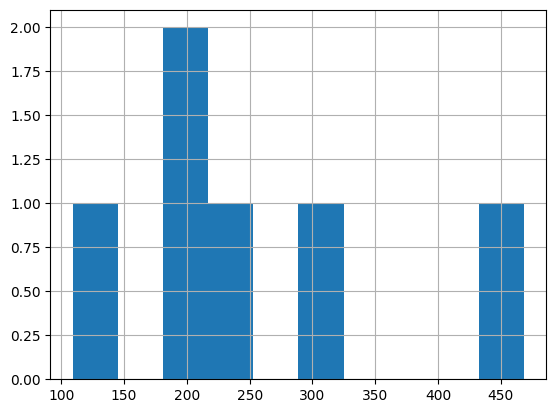

In [8]:
average_converters_by_carb.set_index("carb")['converters'].hist()

In [ ]:


# Create a histogram of the average converters by carb
alt.Chart(average_converters_by_carb).mark_bar().encode(
    alt.X('converters:Q',
          bin=alt.Bin(maxbins=3), title='Average Converters Price'),
    alt.Y('count()', title='Frequency') # count number of occurances per bin
).properties(
    width=400,
    height=300,
    title='Histogram of Average Converters Price by Carborators'
)

alt.Chart(...)

From the data above we see that there could be a pattern to the data, or perhaps we just don't have enough!

**Career Tip**: The take-away that there isn't sufficient data to generate definitive insights *is a useful insight to bring*, just be ready to defend it!


**Note about bins in histograms**:

- Bins are essentially the "buckets" that data points are grouped into.
Each bin represents a range of values on the x-axis of the histogram.
The height of each bar in the histogram represents the frequency of data points in that range.
Choosing the Number of Bins:

- Selecting an appropriate number of bins is important as it can impact the visual representation of the data.
Too few bins may oversimplify the distribution and miss finer patterns in the data.

- Too many bins may overcomplicate the histogram and obscure underlying patterns.

### Coordinates: Further Scrutiny

Looking at the data, you suspect perhaps there is a relationship between weight `wt` and `converters`, but speculate that perhaps it's [heteroskedastic](https://www.investopedia.com/terms/h/heteroskedasticity.asp). So you apply a log weighting to the data to see if shifting the coordinate spece yields better insights.

To shift the **scale** of altair plots, you can encode a specific axis, as we've done with `y` below.

In [ ]:
from math import log

chart = alt.Chart(cars).mark_circle().encode(
    alt.X('converters:Q'),
    alt.Y('wt:Q',
          axis=alt.Axis(title='Log of wt'),
          scale=alt.Scale(type="log")), # Apply log transformation to 'wt' column
    color='model:N',
    tooltip='model:N'
).properties(
    width=400,
    height=400
).interactive()

chart

alt.Chart(...)

It's possible a relationship lies between then. More scrutiny is needed between the log of the weight and converters.

### Layouts and Extra Themes

As suggested above, layouts and aesthetics matter. Here are some suggestions:
1. Ensure that every label is legible and well-sized
2. Avoid superfluous colors and labels. For example, if the title of a chart is "Car Milage" and the tick labels are clearly cars, you may not need an axis label "Cars" as well.
3. Interactivity is generally well-received!

For more on layout configuration in Altair, **I highly suggest you read this [documentation](https://altair-viz.github.io/altair-tutorial/notebooks/08-Configuration.html).

Here are some additional functionalities of Altair you'll want to know:

In [ ]:
alt.Chart(cars).mark_point().encode(
    alt.X('converters:Q',
          axis=alt.Axis(labels=True, ticks=False, title=None)), # you can mess with axis attributes here
    alt.Y('wt:Q',
          axis=alt.Axis(title='Weight'), # axis titles are here!
          scale=alt.Scale(domain=[1, 5],  range=[-5,300])), # adjust the domain and range here!
    color=alt.Color('model:N', scale=alt.Scale(scheme="rainbow")), # change the color
    tooltip='model:N'
).configure_point(
    size=200,
    filled=False
).properties(
    width=400,
    height=400,
    title="THIS IS A TITLE HI!" # chart titles are here
).interactive()


alt.Chart(...)